# 相關性比對


In [1]:
# 做完特徵工程前的所有準備
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data_path = './'

In [2]:
# 欄位格式
CSV_head = ['Date','Time','Turbidity','Conductivity']

## 處理C1的數據

In [3]:
# 讀取CSV並合併資料
df_C1 = pd.read_csv(data_path + 'C1_1120.CSV', names =CSV_head)
df_temp = pd.read_csv(data_path + 'C1_1121.CSV', names =CSV_head)
df_C1 = df_C1.append(df_temp, ignore_index=True)
df_temp = pd.read_csv(data_path + 'C1_1122.CSV', names =CSV_head)
df_C1 = df_C1.append(df_temp, ignore_index=True)
# df_C1.info()

In [4]:
# 把Date, Time的字串轉為DateTime格式，並合併創造一個DateTime的欄位
# 格式轉換
df_C1['Date'] = df_C1['Date'].astype(str)
df_C1['Date']= pd.to_datetime(df_C1['Date'], format="%Y%m%d.0")
df_C1['Time']= pd.to_datetime(df_C1['Time'], format="%H:%M")
# 合併成DateTime欄位
df_C1['Datetime_str'] = df_C1['Date'].dt.strftime('%Y-%m-%d')+ ' ' +df_C1['Time'].dt.strftime('%H:%M')
df_C1['Datetime'] = pd.to_datetime(df_C1['Datetime_str'], format="%Y-%m-%d %H:%M",errors ='coerce')
df_C1['Time']= df_C1['Time'].dt.time
df_C1 = df_C1.drop(['Datetime_str'], axis=1)

df_C1.set_index('Datetime')
# df_C1.info()
# df_C1.head()

,Date,Time,Turbidity,Conductivity
Datetime,,,,
2019-11-20 12:08:00,2019-11-20,12:08:00,459.08,1967.70
2019-11-20 12:08:00,2019-11-20,12:08:00,460.53,1968.95
2019-11-20 12:13:00,2019-11-20,12:13:00,459.80,1968.95
2019-11-20 12:18:00,2019-11-20,12:18:00,459.08,1968.32
2019-11-20 12:23:00,2019-11-20,12:23:00,459.08,1967.70
...,...,...,...,...
2019-11-22 17:59:00,2019-11-22,17:59:00,461.26,1969.57
2019-11-22 18:05:00,2019-11-22,18:05:00,461.99,1970.20
2019-11-22 18:10:00,2019-11-22,18:10:00,461.26,1969.57


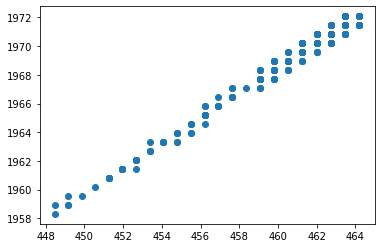

In [5]:
# 先看一下導電度跟濁度的相關性
plt.scatter(df_C1['Turbidity'],df_C1['Conductivity'])
plt.show()


共有658筆資料


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(737383.5055555556, 737385.7638888889)

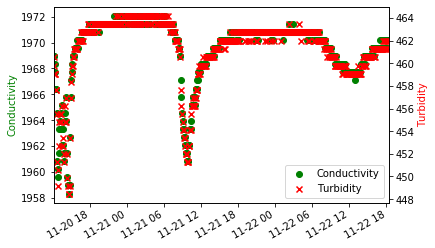

In [6]:
# 建立時間變化的曲線
# 先算出有多少資料
total = df_C1.shape[0]-1
print("共有{}筆資料".format(total))

# 畫成時間變化的曲線
fig, ax1 = plt.subplots()
# 设置ax2的坐标轴与ax1共用x轴
ax2 = ax1.twinx()

L1 = ax1.scatter(df_C1['Datetime'],df_C1['Conductivity'],label='Conductivity', marker="o", color='g')
L2 = ax2.scatter(df_C1['Datetime'],df_C1['Turbidity'],label='Turbidity', marker="x", color='r')

ax1.set_ylabel('Conductivity', color='g')
ax2.set_ylabel('Turbidity', color='r')

plt.legend([L1,L2],[L1.get_label(),L2.get_label()])

fig.autofmt_xdate()
plt.xlim(df_C1['Datetime'][0],df_C1['Datetime'][total])

## 處理C2的數據

In [7]:
# 讀取CSV並合併資料
df_C2 = pd.read_csv(data_path + 'C2_1120.CSV', names =CSV_head)
df_temp = pd.read_csv(data_path + 'C2_1121.CSV', names =CSV_head)
df_C2 = df_C2.append(df_temp, ignore_index=True)
df_temp = pd.read_csv(data_path + 'C2_1122.CSV', names =CSV_head)
df_C2 = df_C2.append(df_temp, ignore_index=True)
# df_C1.info()

In [8]:
# 把Date, Time的字串轉為DateTime格式，並合併創造一個DateTime的欄位
# 格式轉換
df_C2['Date'] = df_C2['Date'].astype(str)
df_C2['Date']= pd.to_datetime(df_C2['Date'], format="%Y-%m-%d")
df_C2['Time']= pd.to_datetime(df_C2['Time'], format="%H:%M")
# 合併成DateTime欄位
df_C2['Datetime_str'] = df_C2['Date'].dt.strftime('%Y-%m-%d')+ ' ' +df_C2['Time'].dt.strftime('%H:%M')
df_C2['Datetime'] = pd.to_datetime(df_C2['Datetime_str'], format="%Y-%m-%d %H:%M",errors ='coerce')
df_C2['Time']= df_C2['Time'].dt.time
df_C2 = df_C2.drop(['Datetime_str'], axis=1)
df_C2.set_index('Datetime')
# df_C2.info()
# df_C2.head()

,Date,Time,Turbidity,Conductivity
Datetime,,,,
2019-11-20 12:21:00,2019-11-20,12:21:00,473.19,1979.58
2019-11-20 12:26:00,2019-11-20,12:26:00,474.72,1980.83
2019-11-20 12:32:00,2019-11-20,12:32:00,474.72,1980.83
2019-11-20 12:37:00,2019-11-20,12:37:00,474.72,1980.83
2019-11-20 12:42:00,2019-11-20,12:42:00,474.72,1980.83
...,...,...,...,...
2019-11-22 23:34:00,2019-11-22,23:34:00,477.03,1982.70
2019-11-22 23:39:00,2019-11-22,23:39:00,477.03,1982.70
2019-11-22 23:45:00,2019-11-22,23:45:00,477.03,1982.70


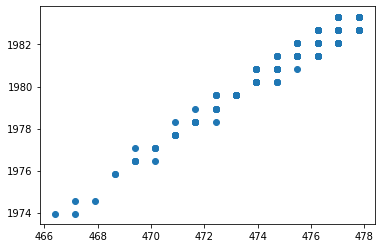

In [9]:
# 先看一下導電度跟濁度的相關性
plt.scatter(df_C2['Turbidity'],df_C2['Conductivity'])
plt.show()

共有697筆資料


(737383.5145833333, 737385.9965277778)

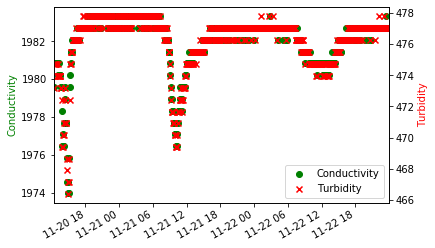

In [10]:
# 建立時間變化的曲線
# 先算出有多少資料
total = df_C2.shape[0]-1
print("共有{}筆資料".format(total))

# 畫成時間變化的曲線
fig, ax1 = plt.subplots()
# 设置ax2的坐标轴与ax1共用x轴
ax2 = ax1.twinx()

L1 = ax1.scatter(df_C2['Datetime'],df_C2['Conductivity'],label='Conductivity', marker="o", color='g')
L2 = ax2.scatter(df_C2['Datetime'],df_C2['Turbidity'],label='Turbidity', marker="x", color='r')

ax1.set_ylabel('Conductivity', color='g')
ax2.set_ylabel('Turbidity', color='r')

plt.legend([L1,L2],[L1.get_label(),L2.get_label()])

fig.autofmt_xdate()
plt.xlim(df_C2['Datetime'][0],df_C2['Datetime'][total])

(737383.5145833333, 737385.9965277778)

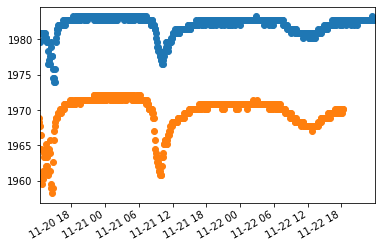

In [11]:
# 把C1 跟 C2的資料放在一起比對一下：濁度
fig = plt.figure(1)
plt.scatter(df_C2['Datetime'],df_C2['Conductivity'],label='C2')
plt.scatter(df_C1['Datetime'],df_C1['Conductivity'],label='C1')
fig.autofmt_xdate()
plt.xlim(df_C2['Datetime'][0],df_C2['Datetime'][total])

(737383.5145833333, 737385.9965277778)

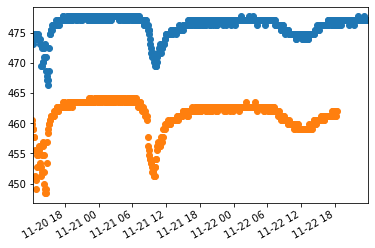

In [12]:
# 把C1 跟 C2的資料放在一起比對一下：導電度
fig = plt.figure(1)
plt.scatter(df_C2['Datetime'],df_C2['Turbidity'],label='C2')
plt.scatter(df_C1['Datetime'],df_C1['Turbidity'],label='C1')
fig.autofmt_xdate()
plt.xlim(df_C2['Datetime'][0],df_C2['Datetime'][total])